In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/home/CIFAR-10 Classifier Using CNN in PyTorch/data/', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


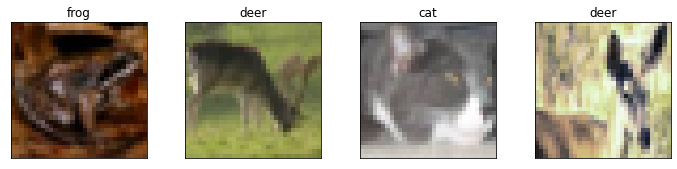

In [17]:
def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

dataiter = iter(trainloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
import os

model_directory_path = '/home/CIFAR-10 Classifier Using CNN in PyTorch/model/'
model_path = model_directory_path + 'cifar-10-cnn-model.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')

Loaded model parameters from disk.


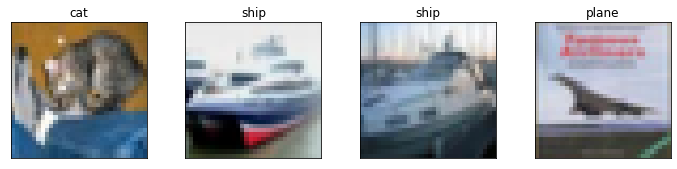

In [18]:
dataiter = iter(testloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [8]:
outputs = net(images)

In [9]:
outputs

tensor([[-0.5587, -1.3294, -0.0147,  1.7789, -0.9728,  0.8734,  0.2706, -0.6086,
         -0.2059,  0.2847],
        [ 4.8533,  5.2669, -0.6852, -2.5590, -2.6156, -4.4962, -2.6582, -4.1807,
          5.4332,  3.9467],
        [ 2.4263,  2.5022, -0.4277, -1.3331, -1.3506, -2.5808, -1.3142, -2.6337,
          3.4305,  2.0966],
        [ 3.4028,  1.2159,  0.6023, -1.1971, -1.3105, -2.9989, -1.2615, -2.8925,
          4.5330,  0.9981]], grad_fn=<AddmmBackward>)

In [10]:
sm = nn.Softmax(dim=1)
sm_outputs = sm(outputs)
print(sm_outputs)

tensor([[3.9401e-02, 1.8229e-02, 6.7883e-02, 4.0804e-01, 2.6041e-02, 1.6498e-01,
         9.0294e-02, 3.7484e-02, 5.6070e-02, 9.1576e-02],
        [2.1242e-01, 3.2121e-01, 8.3527e-04, 1.2825e-04, 1.2120e-04, 1.8481e-05,
         1.1614e-04, 2.5336e-05, 3.7934e-01, 8.5787e-02],
        [1.7642e-01, 1.9033e-01, 1.0164e-02, 4.1103e-03, 4.0391e-03, 1.1803e-03,
         4.1887e-03, 1.1195e-03, 4.8157e-01, 1.2688e-01],
        [2.2771e-01, 2.5563e-02, 1.3840e-02, 2.2892e-03, 2.0437e-03, 3.7772e-04,
         2.1464e-03, 4.2012e-04, 7.0505e-01, 2.0561e-02]],
       grad_fn=<SoftmaxBackward>)


In [11]:
probs, index = torch.max(sm_outputs, dim=1)

for p, i in zip(probs, index):
    print('{0} - {1:.4f}'.format(classes[i], p))

cat - 0.4080
ship - 0.3793
ship - 0.4816
ship - 0.7051


In [12]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 54.98%


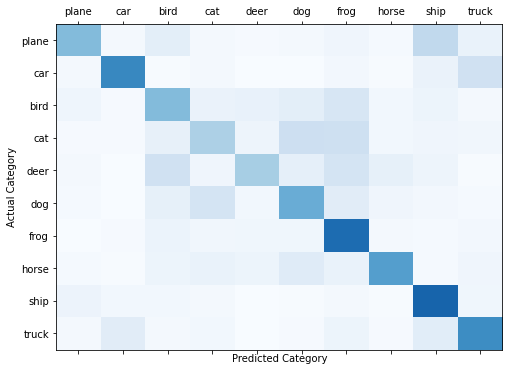

In [14]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

In [19]:
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 44.1
car        - 66.2
bird       - 44.1
cat        - 32.5
deer       - 34.4
dog        - 50.5
frog       - 76.9
horse      - 56.9
ship       - 79.8
truck      - 64.4


In [20]:
print('actual/pred'.ljust(16), end='')
for i,c in enumerate(classes):
    print(c.ljust(10), end='')
print()
for i,r in enumerate(confusion_matrix):
    print(classes[i].ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()
    
    r = r/np.sum(r)
    print(''.ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()

actual/pred     plane     car       bird      cat       deer      dog       frog      horse     ship      truck     
plane           441       19        99        21        9         23        41        13        265       69        
                0.441     0.019     0.099     0.021     0.009     0.023     0.041     0.013     0.265     0.069     
car             18        662       6         17        3         3         24        6         64        197       
                0.018     0.662     0.006     0.017     0.003     0.003     0.024     0.006     0.064     0.197     
bird            46        11        441       66        73        100       160       30        52        21        
                0.046     0.011     0.441     0.066     0.073     0.1       0.16      0.03      0.052     0.021     
cat             10        10        79        325       48        214       209       29        42        34        
                0.01      0.01      0.079     0.325     0.048   

In [23]:
net.conv1

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

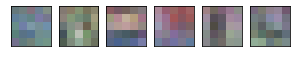

In [29]:
conv1 = net.conv1
weight = conv1.weight.data

fig, axes = plt.subplots(1, len(weight), figsize=(5,5))
for idx, image in enumerate(weight):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [52]:
NUM_CLASSES = 10

class AlexNet(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x
    
alex_net = AlexNet()

In [53]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alex_net.parameters(), lr=0.001, momentum=0.9)

In [54]:
import os

model_directory_path = '/home/CIFAR-10 Classifier Using CNN in PyTorch/model/'
model_path = model_directory_path + 'cifar-10-cnn-model_alex_net.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    alex_net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = alex_net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(alex_net.state_dict(), model_path)
    print('Saved model parameters to disk.')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.261
[1,  6000] loss: 2.063
[1,  8000] loss: 1.906
[1, 10000] loss: 1.802
[1, 12000] loss: 1.728
[2,  2000] loss: 1.622
[2,  4000] loss: 1.568
[2,  6000] loss: 1.456
[2,  8000] loss: 1.418
[2, 10000] loss: 1.374
[2, 12000] loss: 1.324
Finished Training.
Saved model parameters to disk.


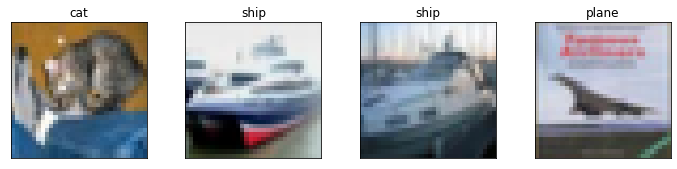

In [45]:
dataiter = iter(testloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [46]:
outputs = alex_net(images)
sm = nn.Softmax(dim=1)
sm_outputs = sm(outputs)
print(sm_outputs)

tensor([[0.0633, 0.0763, 0.1413, 0.1392, 0.0593, 0.1062, 0.1346, 0.0423, 0.1377,
         0.1000],
        [0.1124, 0.3729, 0.0102, 0.0065, 0.0060, 0.0033, 0.0047, 0.0070, 0.2456,
         0.2314],
        [0.1307, 0.1137, 0.1016, 0.0657, 0.0553, 0.0562, 0.1327, 0.0286, 0.1948,
         0.1207],
        [0.2044, 0.0921, 0.0160, 0.0032, 0.0033, 0.0014, 0.0021, 0.0016, 0.6481,
         0.0278]], grad_fn=<SoftmaxBackward>)


In [47]:
probs, index = torch.max(sm_outputs, dim=1)

for p, i in zip(probs, index):
    print('{0} - {1:.4f}'.format(classes[i], p))

bird - 0.1413
car - 0.3729
ship - 0.1948
ship - 0.6481


In [48]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = alex_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 30.14%


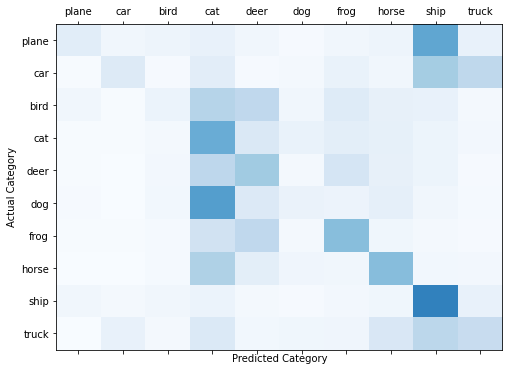

In [49]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()